# Lecture 23
- Clustering
- Matrix Operations

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline
plt.style.use('bmh')

def plotvec(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

# Last Class

### Lecture 21
- Linear Regression
- Coefficient of Determination $R^2$

<div class="alert alert-info">
  <strong>Coefficient of Determination</strong>
    
The **coefficient of determination**, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

$$r^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}}$$

and $ 0 \leq r^2 \leq 1$.

* $r^2$ is the square of the correlation coefficient $r$.
    
</div>

### Norms, Angles, Distances

Take a look at supplementary notebook and video Lecture21-supp

<div class="alert alert-info">
  <strong>Euclidean Norm</strong>

The **Euclidean norm** of an $n$-vector $\mathbf{x}$, denoted $\Vert \mathbf{x}\Vert$, is the square-root of the inner product of the vector with itself, i.e. 

\begin{align*}
\Vert\mathbf{x}\Vert = \sqrt{\mathbf{x}^T\mathbf{x}} = \sqrt{x_1^2+x_2^2+\cdots+x_n^2}=\left(x_1^2+x_2^2+\cdots+x_n^2\right)^{1/2}
\end{align*}
</div>

<div class="alert alert-info">
  <strong>Euclidean Distance</strong>

We already know how to compute **Euclidean distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$, in an Euclidean geometry:

$$d(\mathbf{x},\mathbf{y}) = \Vert\mathbf{x}-\mathbf{y}\Vert$$

The Euclidean distance corresponds to the shortest line that connects the two vectors $\mathbf{x}$ and $\mathbf{y}$.
</div>

### Lecture 22

Please watch Lecture 22 videos - in the Lecture repo.

<div class="alert alert-info">
    <b>Vector Projection</b>

The **vector projection** of $\mathbf{y}$ onto $\mathbf{x}$ is defined as

\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= (\mathbf{y}^T\tilde{\mathbf{x}})\tilde{\mathbf{x}}
\end{align*}
    
where $\tilde{\mathbf{x}} = \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert}$. We can then write,
    
\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert} \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert} = \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert^2} \mathbf{x}
\end{align*}
    
</div>

Note that any vector in $\mathbb{R}^2$ can be represented using new axes. 

<div class="alert alert-info">
    <b>Span</b>
    
We say that $\mathcal{S}=\{\mathbf{x}', \mathbf{y}'\}$ is a **spanning set** for $\mathbb{R}^2$ (or say that $\mathcal{S}$ **spans**  $\mathbb{R}^2$).
</div>

A minimum of 2 spanning vectors are required to represent everything in $\mathbb{R}^2$. (We say that the **dimension** of $\mathbb{R}^2$ is 2.)

Since the cardinality of $\mathcal{S}$ is $\left| \mathcal{S} \right|=2$, $\mathcal{S}$ is **minimal**.

We say that $\mathcal{S}$ is a **minimal spanning set** or a **basis** for $\mathbb{R}^2$.

<div class="alert alert-info">
    <b>Basis Set</b>
    
If $\mathcal{S}$ is a **minimal spanning set**, if the vectors $\mathcal{S}$ are orthonormal, we say that $\mathcal{S}$ is an orthonormal basis for $\mathbf{R}^D$, where $D=|\mathcal{S}|$.
</div>

<div class="alert alert-info">
    <b>Linearly Independent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly independent** if they are not linearly dependent. In other words, the equation 

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =0 $$

only holds if $\beta_0 =\beta_1= \cdots= \beta_{k-1}=\mathbf{0}$.
</div>

___

# K-Means Clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

We can consider the task of clustering a collection of vectors into groups or clusters of vectors that are close to each other, as measured by the distance between pairs of them.

How many groups would you partition the following data into?

In [ ]:
from IPython.display import Image
Image('figures/ClusteringExample.png', width=500)

We can describe each image in a $d$ numerical features, and so each figure (called sample) will be a $d$-vector.

And now, we want to cluster all $N$ images into sets of groups.

Clustering is an **unsupervised** learning algorithm. It's unsupervised because we do not have *ground truth* cluster labels.

## Clustering Applications

* Topic discovery
* Patient clustering
* Customer market segmentation
* Daily energy user patterns
* Image Compression
* Word clustering
* Document clustering 
* etc.

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

The ```scikit-learn``` library has many useful methods for machine learning, including clustering.

In [ ]:
X, y = make_blobs(n_samples = 1500, centers = 5)
plt.scatter(X[:,0],X[:,1]);

There are many ways to perform clustering. For the data set above, for example, we may pose the problem as: the data distribution is a sum of Gaussian distributions - called a *Gaussian Mixture Model*.

With this assumption, we can then develop *optimization* strategies to model our measure for similarity between groups.

## $k$-Means Clustering Algorithm

$k$-Means Clustering is a centroid-based clustering and, instead of a probabilistic model, it uses distance between vectors and centroids in order to group or cluster vectors together.

$k$-Means can be modified to use any distance metric. In here, we will introduce/review it with Euclidean distance.

The value $k$ refers to the number of clusters the user wants to partition the data into. So $k$ is a parameter of the algorithm.

The **first step** of the algorithm is to initialize the $k$ cluster centroids, $\mathbf{c_k}$. The goal is then to assign membership to each vector $\mathbf{x_i}$, $i=1,2,\dots, N$, as belonging to one of $k$ clusters.

We can design a cost function:

\begin{align*}
J &= \sum_{i=1}^N\sum_{k=1}^K u_{ik} d\left(\mathbf{x_i},\mathbf{c_k}\right)^2\\
&= \sum_{i=1}^N\sum_{k=1}^K u_{ik} \left\Vert\mathbf{x_i}-\mathbf{c_k}\right\Vert^2
\end{align*}

where $u_{ik}$ is a membership weight for vector $\mathbf{x_i}$ in cluster centroid $\mathbf{c_k}$, and so, $u_{ik}\in\{0,1\}$ and $\sum_{k=1}^K u_{ik}=1$.

The steps to implement $k$-Means algorithm are:

1. Initialize $k$ cluster centroids
2. Compute distance of every sample to each cluster centroid. For every sample, assign membership corresponding to cluster with smallest distance. 
3. Update cluster centroid as the mean of all the data samples assigned to it
4. Go back to step 2 and continue until some convergence criteria is met

The pseudo-code can be defined as:

In [ ]:
Image('figures/KMeans.png',width=800)

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 1',size=15)
plt.ylabel('Feature 2', size=15);

## Scaling the Data

* **Z-score Standardization**

\begin{align*}
\hat{f}_i = \frac{f_i-\mu_{f_i}}{\sigma_{f_i}}
\end{align*}

* **Min-Max Scaling**

\begin{align*}
\hat{f}_i = \frac{f_i-\min(f_i)}{\max(f_i) - \min(f_i)}
\end{align*}

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.scatter(X[:,0],X[:,1]); plt.title('Original')
plt.subplot(1,3,2); plt.scatter(Xst[:,0],Xst[:,1]); plt.title('Z-Score Standardization')
plt.subplot(1,3,3); plt.scatter(Xmm[:,0],Xmm[:,1]); plt.title('Min-Max Scaling');

Let $k=4$. Initialize the cluster centroids:

Compute the Euclidean distance of every point to every cluster centroid:

Row $i$ contains 4 columns. Column $j$ of row $i$ corresponds to the distance of the 2-vector data point $x_i$ to the cluster centroid $c_j$.

Now, to point $x_1$ we want to assign the label that corresponds to the cluster centroid with the smallest distance:

Now, we need to update the cluster centroids using these memberships:

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

    

plt.subplot(1,2,2)



We will continue this process until convergence...

Let's use ```scikit-learn``` instead to train this clustering algorithm.

### Using ```scikit-learn```

In [ ]:
# another way of creating subplots
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)



fig.add_subplot(1,2,2)



## Issues with $k$-Means

* Final solution will depend on the initialization
* Does not perform well in data with non-linear structure
* Sensitive to data scaling - need to standardize or normalize the data
* Using Euclidean distance, the cluster will be circular/spherical only
* Tend to misrepresent small sample groups

___

## Clustering Validity Criteria

Cluster validity measures can often be paired with domain-knowledge. When we do not know anything about the data, we can use automatic measures to assess the *goodness* of the clustering results.

There are several metrics we can use to validate our clustering results. They can be categorized in three types of criteria:

1. **Internal Criteria:** evaluates the results of a clustering algorithm in terms of quantities that involve the vectors of the data set themselves. The optimal clustering scheme under the internal criteria index includes: **compactness** between samples assigned to the same cluster and **separation** between samples assigned to different clusters

    * Example: **Silhouette index**, range of values is $[-1,1]$ where a silhouette index closer to 1 has better separation and compactness.

2. **External Criteria:**  used to measure how well a clustering result matches a set of *given* labels. External cluster validity indices can be used to: (1) compare the clustering results with the *ground truth* (true labels); (2) compare clustering results between different clustering algorithms to measure how different they are and how stable a particular clustering is on a data set across parameter settings and/or algorithms.

    * Example: **Rand index**, range of values is $[0,1]$ where a rand index closer to 1 corresponds to a better match with the ground truth labels.

3. **Relative Criteria:** measures the results of a clustering structure by comparing it to other clustering schemes, resulting by the same algorithm but with different parameter values. In practice, relative criteria are a combination on internal and external criteria.

In [ ]:



plt.figure(figsize=(15,5))
plt.subplot(1,2,1); 
#
plt.title('Original Data Labeled')


plt.subplot(1,2,2); 
#
plt.title('Clustering Result');

## Example: K-Means for Color Compression

In [ ]:
from sklearn.datasets import load_sample_image

image = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    '''Function to plot pixels in color space, using a subset of 10,000 pixels for efficiency'''
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);


In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

How many possible colors?

Now let's reduce these (approximately) 16 million colors to just 16 colors, using a k-means clustering across the pixel space.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

In [ ]:
recolored_image = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored_image)
ax[1].set_title('16-color Image', size=16);

# Recap

<div class="alert alert-info">
    <b>Linearly Dependent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly dependent** if 
there exist nonzero constants $\beta_0, \beta_1, \ldots, \beta_{k-1}$ such that

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =\mathbf{0}$$

</div>

<div class="alert alert-info">
    <b>Linearly Independent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly independent** if they are not linearly dependent. In other words, the equation 

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =0 $$

only holds if $\beta_0 =\beta_1= \cdots= \beta_{k-1}=0$.
</div>

<div class="alert alert-info">
    <b>Dimensionality</b>

The *dimensionality* of a set of vectors is the **cardinality** of the **largest linearly independent set** of those vectors

* This means that for a set of vectors of cardinality $k$, the dimension is $\le k$

</div>

<div class="alert-success">

**Orthogonal vectors are linearly independent!**
    
* Because they cannot be written as a linear combination of the other.
</div>

**BUT**

<div class="alert-danger">
    
**Linearly independent vectors are not always orthogonal**
</div>

<div class="alert-info">

**Gram-Schmidt gives us a way to determine the dimensionality of a set of vectors and to determine an orthonormal basis for those vectors**
</div>

<div class="alert-success">
    
**The dimensionality of a set of vectors is the cardinality of the basis found  by Gram-Schmidt**    
</div>

<div class="alert alert-info">
    <b>Rotation Matrix</b>

The vectors for 2-D axes rotated **counterclockwise** by $\theta$ degrees are $\mathbf{x}'=[\cos \theta, \sin\theta]^T$ and $\mathbf{y}'=[\cos (\theta + 90^\circ), \sin(\theta+90^\circ)]^T$. Applying standard trignometry identities, we have $\mathbf{y}'=[-\sin (\theta ), \cos(\theta)]^T$. Thus, the vertically stacked vectors form the following rotation array:

\begin{align*}
R = \left[\mathbf{x} | \mathbf{y}\right] = \left[\begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]
\end{align*}

</div>

Let's load the **Iris Dataset**.

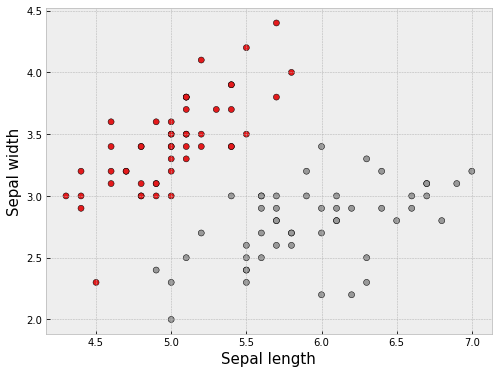

In [2]:
from sklearn import datasets
iris=datasets.load_iris() # loading the iris dataset

#Let's just look at the first 2 classes and the first 2 features:
class01 = np.where(iris.target!=2)[0]

X = iris.data[class01,:2].T # data matrix of size 2-by-100
y = iris.target[class01] # vector of labels of size 100-by-1

plt.figure(figsize=(8, 6))
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length',size=15); plt.ylabel('Sepal width', size=15);

In [3]:
def makerot(theta):
    '''This function creates a 2x2 rotation 
    matrix for a given angle (theta) in degrees'''
    
    theta=np.radians(theta)
    
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    
    return R

In [4]:
R = makerot(60)  # Compare with lecture 40
R

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

We know how to perform the dot product of these axes vectors with a single vector:

In [5]:
X.shape # 2 features and 100 points

(2, 100)

In [6]:
X[:,0]

array([5.1, 3.5])

In [7]:
r1 = R@X[:,0] # rotating this sample by 60 degrees
r1

array([-0.48108891,  6.16672956])

We can rotate all the vectors in the iris data set by taking the inner product of the basis vectors (in columns of an array) with data in columns of an array:

In [18]:
rotated = R@X

X.shape, rotated.shape

((2, 100), (2, 100))

Using this, plot the rotated data, and find a rotation that makes the two clusters separable using only the x-axis value:

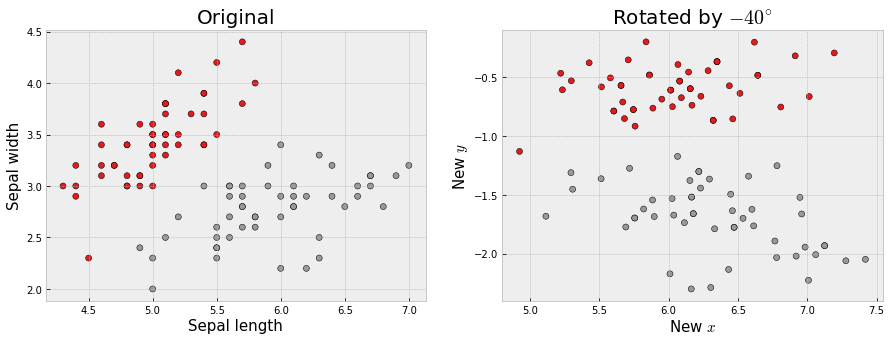

In [29]:
axes = makerot(-40)
# Find a good value that allows data to be 
# separated using only x-axis info

rotated=axes@X

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length',size=15); plt.ylabel('Sepal width', size=15)
plt.title('Original',size=20)

plt.subplot(122)
plt.scatter(rotated[0, :], rotated[1,:], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('New $x$',size=15); plt.ylabel('New $y$', size=15)
plt.title('Rotated by $-40^{\circ}$',size=20);

With our perspective of arrays as horizontally stacked vectors, we can do inner products with any numbers of vectors and get out the corresponding inner products.

For example:

In [30]:
G = np.array([[3,7], # two 3-vectors
            [1,1],
            [0,-2]])

G

array([[ 3,  7],
       [ 1,  1],
       [ 0, -2]])

In [31]:
G.shape

(3, 2)

In [32]:
H = np.array([[2,2,2,2], # four 3-vectors
            [-1,2,-1,2],
            [5,3,2,4]])
H

array([[ 2,  2,  2,  2],
       [-1,  2, -1,  2],
       [ 5,  3,  2,  4]])

In [33]:
H.shape

(3, 4)

In [34]:
G.T@H

array([[ 5,  8,  5,  8],
       [ 3, 10,  9,  8]])

The $i$th row represents all the inner product associated with the $i$th vector in G:

In [35]:
G[:,0]@H

array([5, 8, 5, 8])

The $j$th column represents all the inner products associated with the $j$th vector in H:

In [36]:
G.T@H[:,0]

array([5, 3])

Thus the $(i,j)$-th entry in the output matrix is the dot product from the $i$th left vector and the $j$th right vector.

# Matrix Multiplication

This is **matrix multiplication**.

However, usually matrix multiplication is not carried out in exactly this way. 

The usual form for matrix multiplication is to take the dot products of the **rows** of the left-hand matrix with the **columns** of the right-hand matrix.

The ```@```symbol in Python is doing the usual matrix multiplication, which is why we need to transpose ($^T$) the left-hand matrix to conduct inner products on the columns.

For standard matrix multiplication the $(i,j)th$ entry is the dot product of the $i$th **row** of the left-hand matrix with the $j$th **column** of the right-hand matrix.

Let's do an example by hand. I will use the following matrices:
$$ A= \begin{bmatrix} 1& 3\\ 2 & -2 \\ \end{bmatrix} ~~~~~~~ B= \begin{bmatrix} 2 & -1 & 1\\ 3 & 1 & -3\\ \end{bmatrix}$$

* *on electronic whiteboard*

In [ ]:
A=np.array([[1,3], [2, -2]])

B=np.array([[2,-1,1], [3,1,-3]])

If the left array has shape $(r_L, c_L)$ and the right array has shape $(r_R, c_R)$, then two things are true:
1. We must have $c_L = r_R$. **The inner dimensions must be the same!**
2. The dimensions of the output array will be $(r_R, c_L)$. **The shape of the output array is determined by the outer dimensions.**

Let's look at identity matrices in matrix multiplication.

# Matrices vs Arrays

<div class="alert alert-info">
    <b>Matrix</b>
 
A **matrix** is a rectangular array of numbers; that is, it is a 2-dimensional ordered set of values, with equal numbers of elements in each row and equal number of elements in each column.

An **array** is the extension of a matrix that can have more than 2 dimensions.
</div>

* In this class, I will generally use the terms interchangeably
* In ```numpy```, there is a ```np.array()``` class and a ```np.matrix()``` class.
* The ```np.matrix()``` class has **very few advantages** over the ```np.array()``` class. Therefore, we will just use ```np.array()```.

    * Numpy matrices are strictly 2-dimensional, while numpy arrays (ndarrays) are N-dimensional. Matrix objects are a subclass of ndarray, so they inherit all the attributes and methods of ndarrays.
    
    * The main advantage of numpy matrices is that they provide a convenient notation for matrix multiplication: if ```a``` and ```b``` are matrices, then ```a*b``` is their matrix product.

## Special Types of Matrices

We have already been introduced to one type of special matrix: the **identity matrix**

Two other simple types are the **all-zeros matrix**, denoted by $\mathbf{0}$ or $\mathbf{0}_n$, and the **all-ones matrix**, denoted by $\mathbf{1}$ or $\mathbf{1}_n$:

**Unlike the identity matrix, zeros and ones matrices are not necessarily square.**

<div class="alert alert-info">
    <b>Diagonal Matrix</b>
 
A **diagonal matrix** $\mathbf{M}$ has non-zero entries only in the diagonal elements $\mathbf{M}_{ii}$ and zeros everywhere else.
</div>

```numpy``` provides methods to go from a list or vector of elements on the diagonal to a diagonal matrix:

Given a diagonal matrix, the same function will return a vector of the elements on the diagonal:

The identity matrix is a diagonal matrix with all 1s on the diagonal:

<div class="alert alert-info">
    <b>Upper-diagonal Matrix</b>
    
An **upper-diagonal matrix** $\mathbf{U}$ has $U_{ij}=0$ for all $i>j$.

</div>

Example:

In [ ]:
U=np.array([
    [1,3,7],
    [0,4,2],
    [0,0,5]])
U

<!-- <div class="alert alert-info"> -->
<!--     <b>Lower-diagonal Matrix</b> -->

**Lower-diagonal Matrix**

An **lower-diagonal matrix** $\mathbf{L}$ has $L_{ij}=0$ for all $i<j$.

<!-- </div> -->

Example:

In [ ]:
L=np.array([
    [1,0,0],
    [2,4,0],
    [5,3,7]])
L

## Matrix Transpose

<div class="alert alert-info">
    <b>Matrix Transpose</b>

The **transpose of a matrix** $\mathbf{M}$ is denoted by $\mathbf{M}^T$ and satisfies $(\mathbf{M}^T)_{ij} = \mathbf{M}_{ji}$.

* The rows of $\mathbf{M}$ become the columns of $\mathbf{M}^T$, and vice versa.
</div>

In [ ]:
npr.seed(12)

M=npr.randint(4, size=(3,3))

print(M,'\n\n', M.T)

**Transpose does not require a square matrix:**

In [ ]:
M=np.array([
    [1,2,3,4],
    [5,6,7,8]])

M.T

## Matrix Addition and Subtraction

**Matrices of the same sizes can be added or subtracted.** Addition/subtraction is performed elementwise; i.e. 

\begin{align*}
(\mathbf{A}+\mathbf{B})_{ij}= \mathbf{A}_{ij} + \mathbf{B}_{ij}
\end{align*}

and

\begin{align*}
(\mathbf{A}-\mathbf{B})_{ij}= \mathbf{A}_{ij} -\mathbf{B}_{ij}
\end{align*}

In [ ]:
npr.seed(10)

A=npr.randint(4,size=(3,2))
B=npr.randint(4,size=(3,2))

In [ ]:
print('A=',A,'\n\n B=', B, '\n\n A+B=', A+B)

In [ ]:
print('A=',A,'\n\n B=', B, '\n\n A-B = ',A-B)

Because matrix addition and subtraction are elementwise, matrix addition inherits the following properties from scalar addition:

* **Commutativity** $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$
* **Associativity** $( \mathbf{A} + \mathbf{B}) + \mathbf{C} =  \mathbf{A} + (\mathbf{B} + \mathbf{C})$
* **Additive Identity** The additive identity is the zero matrix. That means $\mathbf{A} + \mathbf{0} = \mathbf{0}+ \mathbf{A}= \mathbf{A}$
* **Transpose distributes over addition** $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$

## Scalar-Matrix Multiplication

Multiplication of a matrix by a scalar results in multiplication of each element with that scalar:

\begin{align*}
\alpha \begin{bmatrix} m_{00} & m_{01} & \ldots & m_{0j}\\ m_{10} & m_{11} & \ldots & m_{1j}\\ \vdots & \vdots & \vdots & \vdots \\ m_{k0} & m_{k1} & \ldots & m_{kj}\\ \end{bmatrix} = \begin{bmatrix} \alpha m_{00} & \alpha m_{01} & \ldots & \alpha m_{0j}\\ \alpha m_{10} & \alpha m_{11} & \ldots & \alpha m_{1j}\\ \vdots & \vdots & \vdots & \vdots \\ \alpha m_{k0} & \alpha m_{k1} & \ldots & \alpha m_{kj}\\ \end{bmatrix}
\end{align*}

Scalar-matrix multiplication satisfies several properties:

\begin{align*}
(\beta + \gamma) \mathbf{A} = \beta \mathbf{A} + \gamma \mathbf{A}
\end{align*}

and

\begin{align*}
(\beta \gamma) \mathbf{A} = \beta (\gamma \mathbf{A})
\end{align*}

As with usual multiplication and addition, scalar-matrix multiplication takes priority over matrix addition, so 

\begin{align*}
\beta \mathbf{A} + \gamma \mathbf{A} =  (\beta \mathbf{A}) + (\gamma \mathbf{A})
\end{align*}

## Matrix Norm

<div class="alert alert-info">
    <b>Matrix Norm</b>
    
The norm of an $m \times n$ matrix $\mathbf{A}$ is 
\begin{align*}    
\left\| \mathbf{A} \right\| = \sqrt{\sum_{i=0}^{m-1}\sum_{j=0}^{n-1} A_{ij}^{2}}
\end{align*}
</div>

Matrix norm satisifies several properties:
* **Triangle Inequality** $\left\| \mathbf{A} + \mathbf{B} \right\| \le \left\| \mathbf{A} \right\| + \left\| \mathbf{B} \right\| $
* **Norm of Transposed Matrix** $\left\| \mathbf{A}^T \right\| = \left\| \mathbf{A} \right\|$
* **Relation to Vector Norms** If $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{n-1}$ are the columns of a matrix $\mathbf{A}$, then $\left\| \mathbf{A} \right\|^2 = \left\| \mathbf{a}_0 \right\|^2 + \left\| \mathbf{a}_1 \right\| ^2+ \ldots + \left\| \mathbf{a}_{n-1}  \right\|^2$

We can use the matrix norm to define distance between two matrices $\mathbf{A}$ and $\mathbf{B}$ as $\left\| \mathbf{A} - \mathbf{B} \right\|$. Small distances imply the two matrices are similar

___
## Reading

Be sure to **study**  Chapter 6 in the Boyd and Vanderberghe *Introduction to Applied Linear Algebra* book.

___